<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Aprendizaje%20no%20supervisado%20II%20/%20Christian_Trilleras_Aprendizaje_no_supervisado_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## problema 1

Considere el conjunto de datos Fashion de MNIST el cual puede descargar usando el siguiente snippet de codigo


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=40996)
#Este es un DataFrame que contiene las imágenes de Fashion MNIST, donde cada fila representa una imagen
#(784 características, una por cada píxel en una imagen de 28x28).


1. Muestre en pantalla 20 imágenes del conjunto de datos
2. Entrene un clasificador con Support Vector Machines para determinar el tipo de prenda representado en la imagen, calcule el tiempo de ejecución y el accuracy en este caso
3. Con el mismo conjunto aplique PCA para reducir la dimensionalidad del conjunto de datos asegurando de mantener el 80% de la varianza
4. Con el conjunto de datos reducido haga el mismo entrenamiento. Cómo varía el tiempo de ejecución? Cómo varía el accuracy?

Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas:
0 camisetas/tops
1 pantalón
2 jerseys
3 vestidos
4 abrigo
5 sandalias
6 camisas
7 zapatillas
8 bolsa
9 Botín

# 1) Muestre en pantalla 20 imágenes del conjunto de datos

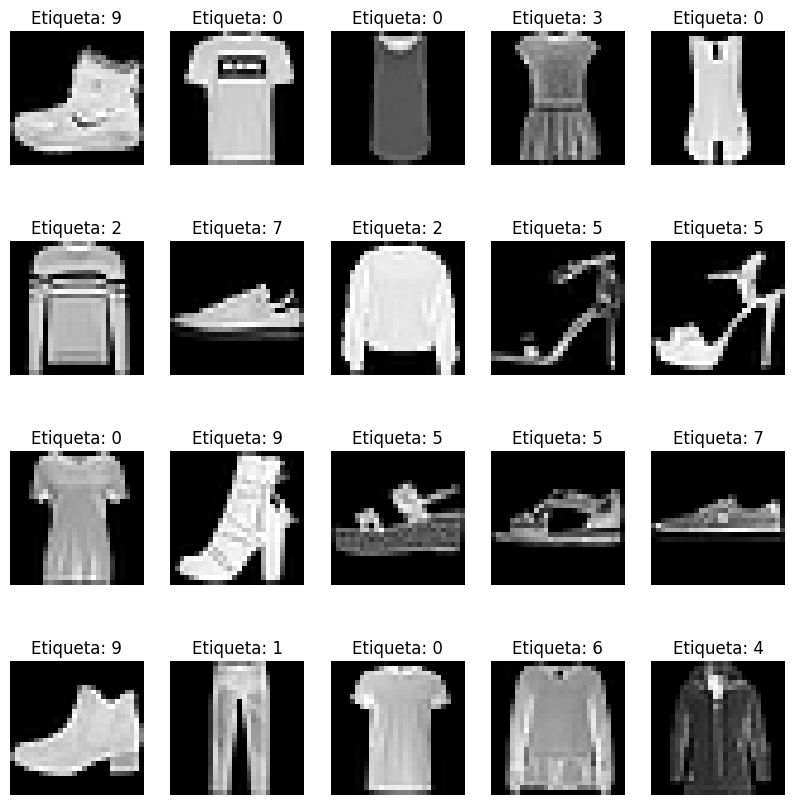

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Aquí estamos separando las características (imágenes) y las etiquetas en las variables X y y, respectivamente.
X, y = mnist.data, mnist.target
# mnist.data  Este es un array que contiene las etiquetas correspondientes a cada imagen
# mnist.target Las etiquetas indican la clase de la prenda (0 a 9).
# Convertir las etiquetas a enteros
y = y.astype(int)

# Mostrar 20 imágenes del conjunto de datos
#Crea una figura y una cuadrícula de subplots (ejes) con 4 filas y 5 columnas. figsize=(10, 10) establece el tamaño de la figura en 10x10.
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
axes = axes.ravel() #Convierte el array bidimensional de ejes (4x5) en un array unidimensional de 20 elementos.

for i in range(20):
    axes[i].imshow(X.iloc[i].values.reshape(28, 28), cmap='gray') #Selecciona la i-ésima fila del DataFrame X, obtiene los valores como un array y los reorganiza en una matriz de 28x28 (la forma original de la imagen).
    axes[i].set_title(f'Etiqueta: {y[i]}') #Establece el título del i-ésimo subplot con la etiqueta correspondiente de la imagen.
    axes[i].axis('off') # elimina las marcas y líneas de los ejes alrededor de la imagen.

plt.subplots_adjust(hspace=0.5)
plt.show()

#2) Entrene un clasificador con Support Vector Machines

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from time import time

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc=StandardScaler()
#Escalar los datos
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
# Entrenar el clasificador SVM
svm_clf = SVC(kernel='linear', random_state=42)

# Medir el tiempo de ejecución
ti = time()
svm_clf.fit(X_train_sc, y_train)  # Asegurarse de llamar a fit
tf=time()
print(tf-ti)
# Calcular el accuracy
y_pred = svm_clf.predict(X_test_sc)  # Predecir después de ajustar el modelo
accuracy = accuracy_score(y_test, y_pred)

#print(f"Tiempo de ejecución: {end_time - start_time} segundos")
print(f"Accuracy: {accuracy}")

1572.31165933609
Accuracy: 0.8460714285714286


#3. PCA para reducir la dimensionalidad del conjunto de datos asegurando de mantener el 80% de la varianza

In [ ]:
from sklearn.decomposition import PCA
#¿PREGUNTA!!!!!!!!!!!!!!!!!!!!!!!!!!!!?

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Aplicar PCA
pca = PCA(n_components=0.80, random_state=42) #numero de componentes principales necesarios para que me expliquen el 80% de la varianza
X_reduced = pca.fit_transform(X_scaled)

# Mostrar la cantidad de componentes retenidos
print(f"Componentes retenidos: {pca.n_components_}")


Componentes retenidos: 50


 ## 4.Con el conjunto de datos reducido haga el mismo entrenamiento.

In [ ]:
# Dividir los datos reducidos en conjunto de entrenamiento y prueba
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Escalar nuevamente (opcional, no generalmente necesario)
# X_train_reduced_sc = scaler.fit_transform(X_train_reduced)
# X_test_reduced_sc = scaler.transform(X_test_reduced)

# usar directamente los datos reducidos:
X_train_reduced_sc = X_train_reduced
X_test_reduced_sc = X_test_reduced
# Entrenar el clasificador SVM con datos reducidos
svm_clf_reduced = SVC(kernel='linear', random_state=42)

# Medir el tiempo de ejecución
ti_reduced = time()
svm_clf_reduced.fit(X_train_reduced_sc, y_train_reduced)
tf_reduced = time()

# Calcular el accuracy
y_pred_reduced = svm_clf_reduced.predict(X_test_reduced_sc)
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)

print(f"Tiempo de ejecución con PCA: {tf_reduced - ti_reduced} segundos")
print(f"Accuracy con PCA: {accuracy_reduced}")


Tiempo de ejecución con PCA: 347.1937391757965 segundos
Accuracy con PCA: 0.8441428571428572


#Conclusión

Reducir la dimensionalidad del conjunto de datos disminuye la cantidad de cálculos necesarios durante el entrenamiento del modelo SVM, lo que resulta en un menor tiempo de ejecución. En cuanto a la precisión, esta disminuye en un porcentaje muy bajo, esto puede ser debido a que al reducir la dimensionalidad, se puede perder información relevante que es crucial para el modelo. Sin embargo en este caso dicha disminución no es significativa.

## Ejercicio 2

Realice un ejercicio de agrupamiento para el conjunto de datos adjunto. El conjunto de datos hace referencia a información sobre clientes de un banco con los siguientes atributos

Columnas 1 y 2 son identificadores de los clientes, no hacen parte de los atributos de importancia
Col 3: Limite en la tarjeta de crédito del cliente
Col 4: Numero de tarjetas de crédito del cliente
Col 5: Numero de visitas presenciales al banco
Col 6: Numero de visitas online al banco
Col 7: Numero de llamadas al banco

Esta es una tarea típica de segmentación de clientes para encontrar clientes leales, envío de de publicidad específica etc..

1. Entrene un algoritmo de k-means usando todas las características.
2. Implemente el método de las Siluetas para establecer el número óptimo de clústers
3. Realice una gráfica que muestre las distintas agrupaciones en el espacio 2-dimensional de los 2 primeros componentes principales.

Qué arroja su análisis de este conjunto de datos?

# Librerías necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#Cargar banco de datos

In [ ]:
datos=pd.read_csv('Credit Card Customer Data.csv')
datos

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


# Eliminar columnas de identificadores

In [ ]:
datos = datos.iloc[:, 2:]
datos

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


## Escalamiento de características

Como nuestro algoritmo hace uso de distancia para su entrenamiento, es una buena práctica escalar las variables

In [ ]:
# Escalar las características
scaler = StandardScaler()
X_sc = scaler.fit_transform(datos)

## Entrenar el algoritmo k-means

Para entrenar el algoritmo hago uso del método de las siluetas para identificar el número óptimo de clústers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

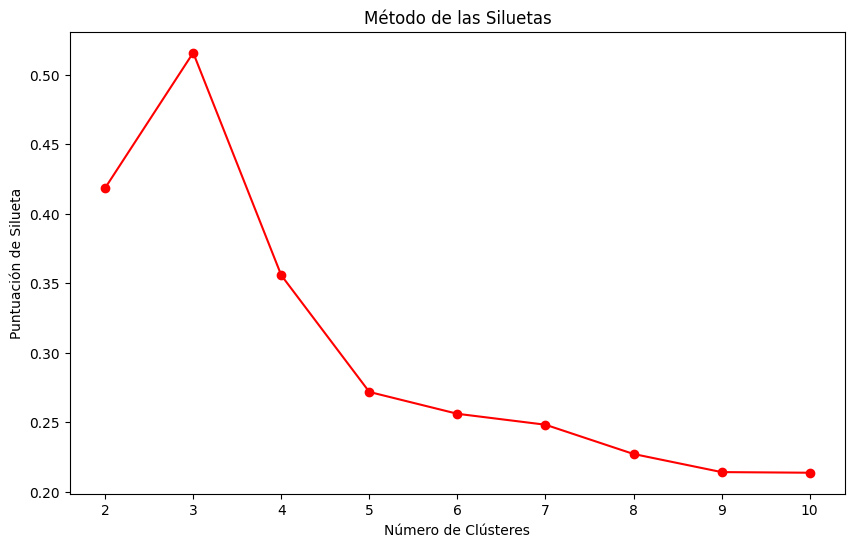

In [ ]:
silhouette_scores = []
for i in range(2, 11):  # El número mínimo de clústeres es 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    etiqueta_kmeans = kmeans.fit_predict(X_sc)
    silhouette_avg = silhouette_score(X_sc, etiqueta_kmeans) # Calcular la puntuación de silueta
    silhouette_scores.append(silhouette_avg)
# Graficar el método de las siluetas
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.title('Método de las Siluetas')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')
plt.show()

# Aplicar K-means con el número óptimo de clústeres (método Siluetas)

In [ ]:
clusters_optimos_s = 3  # el número óptimo de clústeres es aquel que maximiza la puntuación de silueta. En este caso, el punto más alto en la gráfica es para 2
kmeanss = KMeans(n_clusters=clusters_optimos_s, init = 'k-means++', random_state=42, n_init='auto')
etiqueta_kmeanss = kmeanss.fit_predict(X_sc)
print(etiqueta_kmeanss)

[0 2 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Aplicar PCA para reducción a 2 dimensiones

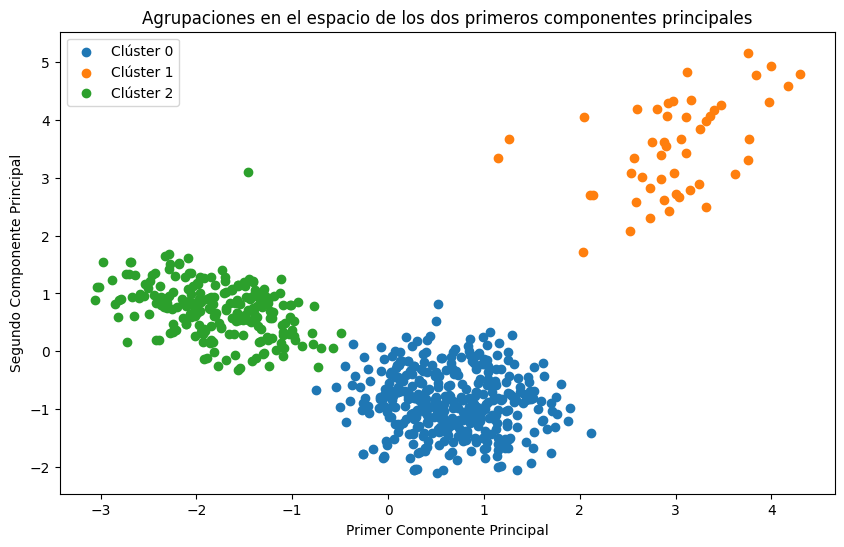

In [ ]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sc)

# Visualizar las agrupaciones
plt.figure(figsize=(10, 6))
for cluster in range(clusters_optimos_s):
    plt.scatter(X_pca[etiqueta_kmeanss  == cluster, 0], X_pca[etiqueta_kmeanss == cluster, 1], label=f'Clúster {cluster}')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Agrupaciones en el espacio de los dos primeros componentes principales')
plt.legend()
plt.show()

## Ejercicio 3

Descargue una imagen de su preferencia. Realice una compresión de la imagen usando tantos componentes principales sean necesarios para mantener el 25%, el 50%, el 75% y el 85% de la varianza. Muestre la imagen resultante en cada caso.

#Librerías Necesarias

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#Cargar Imagen

(717, 640)


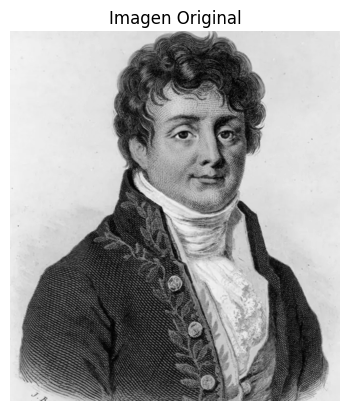

In [ ]:
A = imread("fourier.webp")  # arreglo numérico con 3 capas RGB

# Convertir la imagen a escala de grises tomando el promedio sobre la tercera dimensión
X = np.mean(A, -1)  # promedio sobre la tercera dimensión
print(X.shape)  # Imprimir las dimensiones de la imagen

# Mostrar la imagen original en escala de grises
plt.figure(1)
img = plt.imshow(X)
img.set_cmap("gray")  # escala de grises
plt.axis("off")  # sin ejes
plt.title("Imagen Original")
plt.show()

#Realizar la Descomposición en Valores Singulares (SVD)
1. **`np.linalg.svd(X, full_matrices=False)`**: Esta línea realiza la descomposición en valores singulares (SVD) de la matriz `X`. La descomposición en valores singulares descompone la matriz `X` en tres matrices:
   - `U`: Una matriz ortogonal.
   - `S`: Un vector con los valores singulares (es decir, raíces cuadradas de los valores propios de la matriz `X^T X`).
   - `VT`: La transpuesta de la matriz ortogonal `V`.

In [ ]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S) #La variable S contiene los valores singulares en forma de vector.
#convierte este vector en una matriz diagonal donde los valores singulares están en la diagonal principal.
#Esta matriz S se usa para reconstruir la matriz original en el paso posterior.

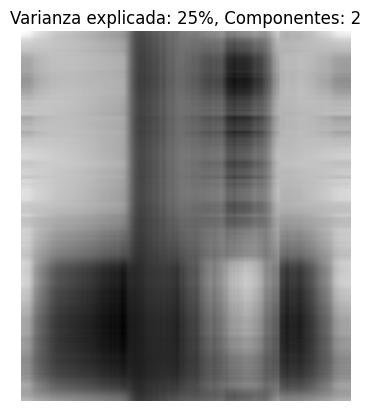

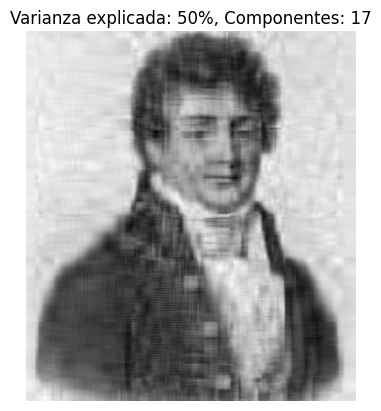

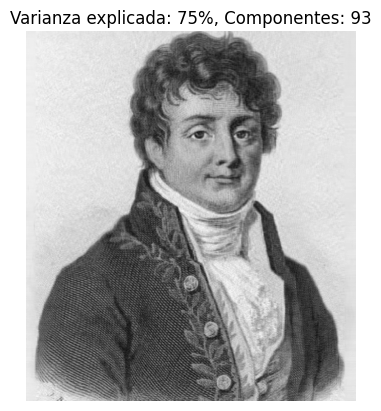

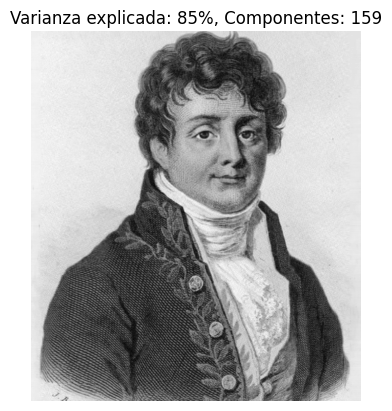

In [ ]:
# Calcular la varianza explicada acumulativa
varianza_acumulada = np.cumsum(S.diagonal()) / np.sum(S.diagonal())
#np.sum(S.diagonal()): Calcula la suma total de los valores singulares. Esta es la varianza total.
#Calcula la suma acumulativa de los valores singulares. Esto nos dice la varianza explicada acumulativa.
#Dividir la suma acumulativa de los valores singulares entre la suma total nos da la fracción de la varianza explicada acumulativamente para cada número de componentes.

# Función para encontrar el número de componentes para la varianza requerida
def encontrar_componentes_para_varianza(varianza):
    return np.searchsorted(varianza_acumulada, varianza) + 1
# Encuentra el índice en varianza_acumulada donde se encuentra el primer valor que es mayor o igual que varianza.
#Este índice indica cuántos componentes se necesitan para alcanzar la varianza deseada.

# Varianzas objetivo
varianzas = [0.25, 0.50, 0.75, 0.85]

# Crear aproximaciones de la imagen para cada nivel de varianza requerida
for j, varianza in enumerate(varianzas, start=1):
    r = encontrar_componentes_para_varianza(varianza)

    # Construir la imagen aproximada usando los primeros r componentes
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
#Reconstruye una aproximación de la matriz original X usando solo los primeros r componentes de U, S, y VT.


    # Mostrar la imagen aproximada
    plt.figure(j + 1)
    img = plt.imshow(Xapprox)
    img.set_cmap("gray")
    plt.axis("off")
    plt.title(f'Varianza explicada: {varianza * 100:.0f}%, Componentes: {r}')
    plt.show()
